In [1]:
from pulser import Pulse, Sequence, Register
from pulser.devices import Chadoq2

In [2]:
from simulation import Simulation

simulation module...


In [3]:
from pulser.waveforms import RampWaveform, GaussianWaveform

def qubits_benchmark(N):
    number_atoms = N
    reg = Register.rectangle(1, number_atoms, spacing=4.9,prefix='q')
    device = Chadoq2(reg) 
    #reg.draw()

    #Define sequence and Set channels
    seq = Sequence(device)
    seq.declare_channel('local', 'raman_local')
    seq.declare_channel('global', 'rydberg_global')

    duration = 300
    amp_wf = GaussianWaveform(duration, 1, 150)   # Duration: 300 ns, Max Amp: 1 MHz, Stdev: 150 ns
    detuning_wf = RampWaveform(duration, -20, 20)  # Duration: 300ns, linear sweep from -20 to 20 MHz

    complex_pulse = Pulse(amp_wf, detuning_wf, phase=20)
    #complex_pulse.draw()

    seq.target('q1','local')
    seq.add(complex_pulse, 'local')
    seq.add(complex_pulse, 'global')
    #seq.draw()
    
    my_experiment = Simulation(seq,reg)
    pauli_Z = my_experiment._operators['rydZ']
    my_experiment.simulate(pauli_Z,plot=False)
    
def sequence_benchmark(N):
    number_atoms = 2
    reg = Register.rectangle(1, number_atoms, spacing=4.9,prefix='q')
    device = Chadoq2(reg) 
    #reg.draw()

    #Define sequence and Set channels
    seq = Sequence(device)
    seq.declare_channel('local', 'raman_local')
    seq.declare_channel('global', 'rydberg_global')

    duration = 300
    amp_wf = GaussianWaveform(duration, 1, 150)   
    detuning_wf = RampWaveform(duration, -20, 20)  

    complex_pulse = Pulse(amp_wf, detuning_wf, phase=20)
    #complex_pulse.draw()

    seq.target('q1','local')
    for _ in range(N):
        seq.add(complex_pulse, 'local')
        seq.add(complex_pulse, 'global')
        #seq.draw()    
        
    my_experiment = Simulation(seq,reg)
    pauli_Z = my_experiment._operators['rydZ']
    my_experiment.simulate(pauli_Z,plot=False)
    

In [4]:
import timeit
results = []

for k in range(2,4):
    print(f'Number of qubits: {k}')
    times = %timeit -o qubits_benchmark(k)
    results.append(times)

Number of qubits: 2
1.54 s ± 152 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Number of qubits: 3
2.63 s ± 106 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


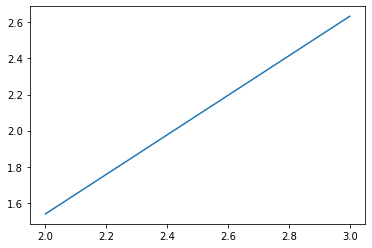

In [5]:
import matplotlib.pyplot as plt

mean_times = [r.average for r in results]
plt.plot(range(2,4),mean_times)

In [10]:
#results = []

for k in range(6,8):
    print(f'number of pulses = {2*k}')
    times = %timeit -o sequence_benchmark(k)
    results.append(times)

number of pulses = 12
8.67 s ± 142 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
number of pulses = 14
9.72 s ± 186 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


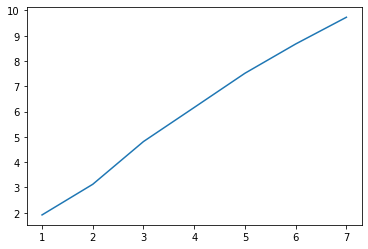

In [11]:
import numpy as np

mean_times = [r.average for r in results]
plt.plot(np.arange(1,8),mean_times)